#Clasificación multiclase
Taquichiri Huarita Luis Alexander

Importar librerías

In [387]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

Cargar y revisar el data set


In [388]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [389]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/machine learning/datasets/Player_Attributes.csv', delimiter=',', decimal='.')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177037 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177037 non-null  int64  
 1   player_fifa_api_id   177037 non-null  int64  
 2   player_api_id        177037 non-null  int64  
 3   date                 177037 non-null  object 
 4   overall_rating       177037 non-null  float64
 5   potential            177037 non-null  float64
 6   preferred_foot       177037 non-null  object 
 7   attacking_work_rate  177037 non-null  object 
 8   defensive_work_rate  177037 non-null  object 
 9   crossing             177037 non-null  float64
 10  finishing            177037 non-null  float64
 11  heading_accuracy     177037 non-null  float64
 12  short_passing        177037 non-null  float64
 13  volleys              177037 non-null  float64
 14  dribbling            177037 non-null  float64
 15  curve                1

Cargamos las variables x, y y m demás de tomar datos del mismo data set para predicciones

In [390]:
X = data.iloc[:16000, [5,9,10,11,12,13,14,15,16,17]]
y = data.iloc[:16000, 4]
m = y.size

X_predic = data.iloc[16000:20000, [5,9,10,11,12,13,14,15,16,17]]
y_predic = data.iloc[16000:20000, 4]
m_predic = y_predic.size

num_labels = 4
J_history = []

Convertir los datos de y en clases (0,1,2,3)
0 = 0-25; 1=25.1-50; 2=50.1-75; 3=75.1-100
0=mal jugador 1=jugador medio 2=jugador bueno 3=muy buen jugador

In [391]:
import numpy as np
def convertir_clases(y):
  m = y.size
  aux_y = np.zeros(m)
  for i in range(m):
    if y.iloc[i] <= 25:
      aux_y[i] = 0
    elif y.iloc[i] <= 50:
      aux_y[i] = 1
    elif y.iloc[i] <= 75:
      aux_y[i] = 2
    else:
      aux_y[i] = 3
  return aux_y

In [392]:
print(y)
y = convertir_clases(y)
y_predic = convertir_clases(y_predic)
print(y)
print(y_predic)

0        67.0
1        67.0
2        62.0
3        61.0
4        61.0
         ... 
16466    88.0
16467    88.0
16468    88.0
16469    88.0
16470    88.0
Name: overall_rating, Length: 16000, dtype: float64
[2. 2. 2. ... 3. 3. 3.]
[3. 3. 3. ... 2. 2. 2.]


Funcion que normaliza los datos

In [393]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Normalización

In [394]:
X_norm, mu, sigma = featureNormalize(X)
X_predic_norm, mu_predic, sigma_predic = featureNormalize(X_predic)

Función zigmoide

In [395]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

Concatenamos el x0 para los datos de entrenamiento y los datos de prueba

In [396]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X_predic = np.concatenate([np.ones((m_predic, 1)), X_predic_norm], axis=1)

Funcion que calcula el costo y las thetas con el modelo de regresion logistica

In [397]:
def lrCostFunction(theta, X, y, lambda_):

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    m = y.size
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    J_history.append(J)

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J , grad

Funcion para calcular todas las thetas es decir las diferentes thetas para cada clase

In [398]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n))

    for c in np.arange(num_labels):
        J_history = []
        initial_theta = np.zeros(n)
        options = {'maxiter': 100000}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        all_theta[c] = res.x
    return all_theta

Calculo de las thetas y grafica, la cual cada pico representa el descenso del costo para cada clase

(4, 11)


Text(0, 0.5, 'Costo J')

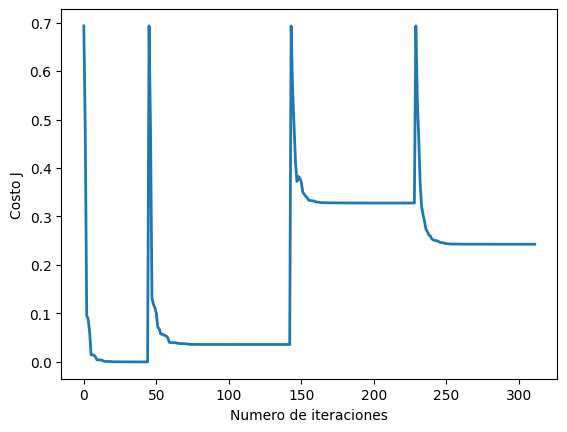

In [399]:
lambda_ = 0.003
all_theta = oneVsAll(X, y, num_labels, lambda_)
print(all_theta.shape)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

In [400]:
print(all_theta)

[[-1.24380805e+01 -1.61012321e-10 -2.81786038e-10 -2.60625544e-10
  -1.48462564e-10 -2.93600555e-10 -2.76178290e-10 -3.02159417e-10
  -2.91073232e-10 -2.76045700e-10 -2.40930453e-10]
 [-7.07562362e+00 -2.01316676e+00 -4.26234024e-01 -2.69022532e-01
  -4.54027815e-01  2.84733070e-01  3.35176902e-01 -5.29354816e-01
   4.27662943e-01  2.15537278e-01 -3.45858234e-01]
 [ 2.33840285e+00 -1.81037671e+00 -1.66441186e-01 -6.49430865e-02
  -7.57541881e-02 -1.13521259e-01 -4.65376065e-01  9.13873873e-01
  -3.15172187e-01  2.01951393e-02 -2.92923958e-01]
 [-3.29535868e+00  2.72034087e+00  2.53240908e-01  1.33759345e-01
   2.42526024e-01  2.96979164e-01  4.41832914e-01 -1.10188404e+00
   3.60527517e-01 -6.47201068e-02  4.24225190e-01]]


Predicción One vs All

In [401]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    return p

Calculamos la efectividad con el mismo data set

In [402]:
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
print("------------------------------------------------------------------------")
print("Datos comparados:")
print(pred[:100])
print(y[:100])

Precision del conjuto de entrenamiento: 87.82%
------------------------------------------------------------------------
Datos comparados:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


Prueba de efectividad con los datos de Prueba

In [403]:
pred_prueba = predictOneVsAll(all_theta, X_predic)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred_prueba == y_predic) * 100))
print("------------------------------------------------------------------------")
print("Datos comparados:")
print(pred_prueba[:100])
print(y_predic[:100])

Precision del conjuto de entrenamiento: 87.85%
------------------------------------------------------------------------
Datos comparados:
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3.
 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
